In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

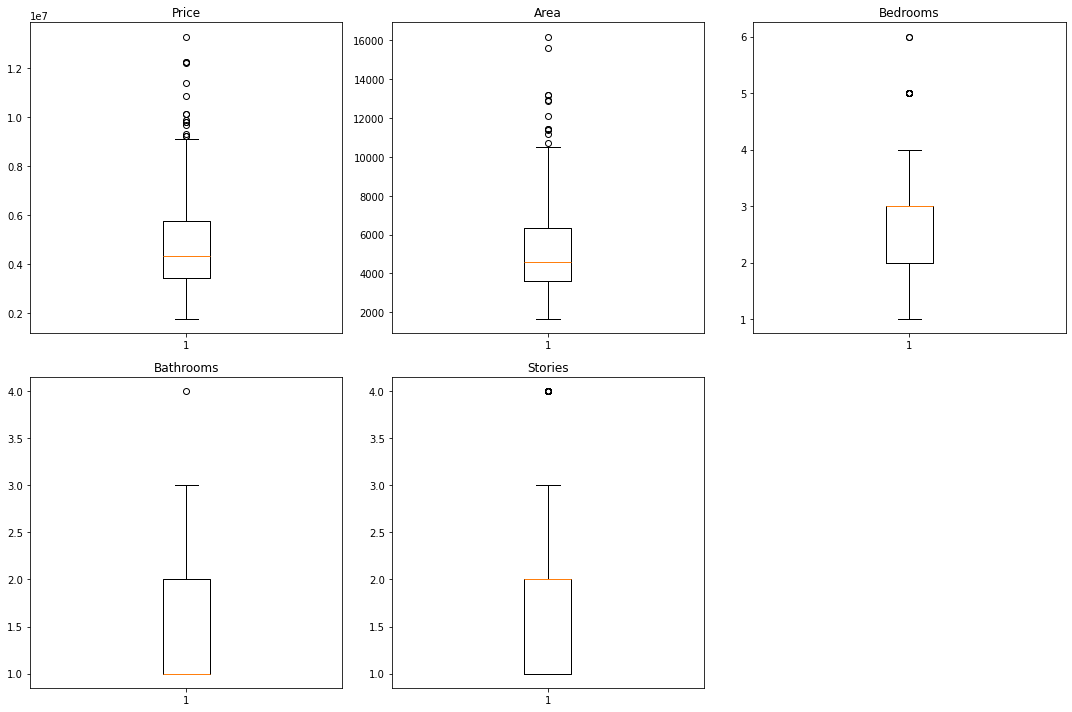

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].boxplot(df['price'])
axs[0, 0].set_title('Price')

axs[0, 1].boxplot(df['area'])
axs[0, 1].set_title('Area')

axs[0, 2].boxplot(df['bedrooms'])
axs[0, 2].set_title('Bedrooms')

axs[1, 0].boxplot(df['bathrooms'])
axs[1, 0].set_title('Bathrooms')

axs[1, 1].boxplot(df['stories'])
axs[1, 1].set_title('Stories')

# Hide the empty subplot
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


In [6]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)

IQR = Q3 - Q1

upperlimit = Q3 + 1.5*IQR
lowerlimit = Q1 - 1.5*IQR

IQR

2310000.0

In [7]:
df_no_outliers = df[(df.price> lowerlimit)&(df.price<upperlimit)]

In [8]:
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [ ]:
df[prefarea] = df[prefarea].map({'no': 0, 'yes':1})

In [9]:
def binary(df, columns):
    for col in columns:
        df[col] = df[col].map({'no': 0, 'yes':1})

# Apply the function to map 0 and 1 to 'No' and 'Yes' for the specified columns
binary(df, varlist)

In [10]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [11]:
status = pd.get_dummies(df['furnishingstatus'], drop_first= True)

In [12]:
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [13]:
df.drop('furnishingstatus',axis=1,inplace=True)

In [14]:
pd.concat([df,status],axis=1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [16]:
X =  df.drop('price',axis=1)
Y = df['price']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
varlist = [ 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [21]:
X_train[varlist] = scaler.fit_transform(X_train[varlist])
X_test[varlist] = scaler.fit_transform(X_test[varlist])


In [22]:
df.drop(['price'],axis=1)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,7420,4,2,3,1,0,0,0,1,2,1
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,1
4,7420,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0
541,2400,3,1,1,0,0,0,0,0,0,0
542,3620,2,1,1,1,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0


In [23]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
314,0.171326,0.2,0.000000,0.333333,1,0,0,0,0,0.333333,0
284,0.438710,0.2,0.000000,0.000000,1,0,0,0,0,0.333333,0
198,0.308100,0.4,0.000000,0.333333,1,0,0,0,1,0.000000,0
492,0.071685,0.4,0.000000,0.333333,1,0,1,0,0,0.333333,0
73,0.354839,0.2,0.333333,1.000000,1,0,1,0,0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
177,0.315412,0.4,0.000000,0.000000,1,0,1,0,0,0.000000,1
401,0.562724,0.4,0.000000,0.333333,1,0,0,0,0,1.000000,1
183,0.453763,0.4,0.000000,0.000000,1,0,0,0,0,0.333333,1
407,0.035484,0.4,0.000000,0.666667,1,0,0,0,0,0.000000,1


In [24]:
Y_train

314    4095000
284    4270000
198    4935000
492    2800000
73     6685000
        ...   
177    5243000
401    3500000
183    5145000
407    3465000
385    3570000
Name: price, Length: 436, dtype: int64

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train,Y_train)

LinearRegression()

In [28]:
y_pred = lm.predict(X_test)

In [29]:
pd.DataFrame(y_pred,Y_test)

,0
price,
6195000,7.068950e+06
3640000,5.836323e+06
7350000,6.989223e+06
3773000,4.773746e+06
4095000,4.004170e+06
...,...
4620000,6.168782e+06
5866000,3.747438e+06
5250000,6.608606e+06


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

# Mean Squared Error (MSE)
mse = mean_squared_error(y_pred, Y_test)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error (RMSE)
rmse = (mse)**0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_pred, Y_test)
print(f'Coefficient of Determination r2: {r2}')

Mean Squared Error (MSE): 1522226762958.854
Root Mean Squared Error (RMSE): 1233785.541720624
Coefficient of Determination r2: 0.49639568688454716
